US Insurance Data

Importing csv module, numpy and matlplotlib library

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

Opening the csv files containing insurance data

In [7]:
with open('insurance.csv') as insurance_data:
    insurance_read = [{k:v for k, v in row.items()}
                      for row in csv.DictReader(insurance_data)]

Making lists of variables of the csv data

In [8]:
    age = []
    sex = []
    bmi = []
    children = []
    smoker = []
    region = []
    charges = []
    
    for item in insurance_read:
        age.append(int(item['age']))
        sex.append(item['sex'])
        bmi.append(item['bmi'])
        children.append(item['children'])
        smoker.append(item['smoker'])
        region.append(item['region'])
        charges.append(float(item['charges']))
        

I am plotting all the variables versus the charges to a scatter plot. This is to get the initial hypothesis about what variable affect the insurance charges the most.

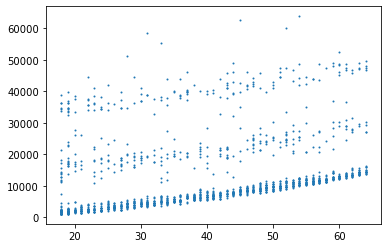

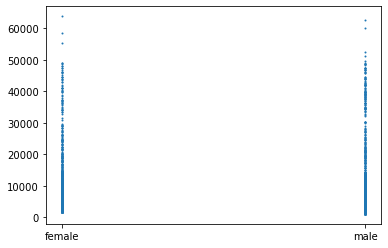

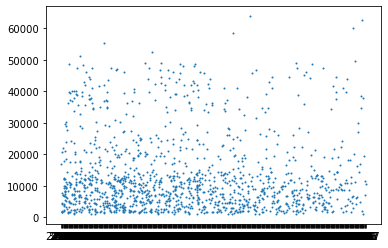

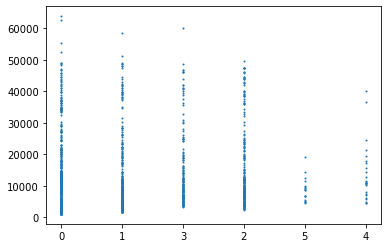

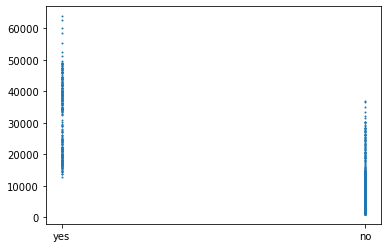

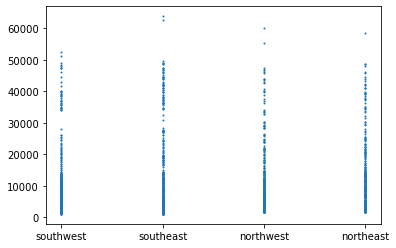

In [10]:
    
    plt.scatter(age, charges, s=1)
    plt.show()
    plt.scatter(sex, charges, s=1)
    plt.show()
    plt.scatter(bmi, charges, s=1)
    plt.show()
    plt.scatter(children, charges, s=1)
    plt.show()
    plt.scatter(smoker, charges, s=1)
    plt.show()
    plt.scatter(region, charges, s=1)
    plt.show()


After plotting the other variables to charges variable. We have hyphotesized that age and smoking details are the two which affect the insurance charge the most. Lets find the stats from the data.

Below is the average of cost using standard pyhton for loops. Without using numpy library. Then print the result.

In [12]:
    total_cost = 0
    
    for cost in range(len(charges)):
        total_cost += cost
    
        
    average_insurance_cost = total_cost/(len(age))
    print('The average cost of insurance in the sample is ' + str(round(average_insurance_cost, 2)) + ' dollars.')
          

The average cost of insurance in the sample is 668.5 dollars.



Calculating the average cost of male correspondent. Then print the result.

In [13]:
    male_cost = 0
    
    for item in insurance_read:
        if item['sex'] == 'male':
            male_cost += float(item['charges'])
    
    average_male_cost = male_cost/(len(age))
    print('The average insurance cost for male correspondents is ' + str(round(average_male_cost, 2)) + ' dollars.')


The average insurance cost for male correspondents is 7051.39 dollars.



Calculating average insurance cost for female correspondents with different coding. Then print the result.

In [14]:
    female_cost = sum(float(d['charges']) for d in insurance_read if d['sex'] == 'female')
    average_female_cost = female_cost/len(age)
        
    print('The average insurance cost for female correspondents is ' + str(round(average_female_cost, 2)) + ' dollars.')


The average insurance cost for female correspondents is 6219.03 dollars.



Difference between male to female insurance cost. Then print the result.

In [15]:
    difference_cost_gender = average_male_cost - average_female_cost
    print('The difference of costs between male and female correspondents is ' + str(round(difference_cost_gender, 2)) + ' dollars.')
    

The difference of costs between male and female correspondents is 832.36 dollars.



Why male insurance cost is more expensive than female? Do the male smoke more? Lets find out.

In [17]:
    male_who_smokes = 0
    female_who_smokes = 0
    
    for i in insurance_read:
        if i['sex'] == 'male' and i['smoker'] == 'yes':
            male_who_smokes += 1
        if i['sex'] == 'female' and i ['smoker'] == 'yes':
            female_who_smokes += 1  
      
    total_male = 0
    total_female = 0
    
    for i in insurance_read:
        if i['sex'] == 'male':
            total_male += 1
        if i['sex'] == 'female':
            total_female += 1
            
    percent_smoker_in_males = male_who_smokes/total_male
    percent_smoker_in_females = female_who_smokes/total_female
    
    print('Why does the average cost between male and female correspondents differs?'
          ' it turns out the percentage of male smoker is ' + str(round(percent_smoker_in_males * 100, 2)) + ' %, which is bigger compared to female smoker of only '
          + str(round(percent_smoker_in_females * 100, 2)) + '%')


Why does the average cost between male and female correspondents differs? it turns out the percentage of male smoker is 23.52 %, which is bigger compared to female smoker of only 17.37%



We found out that the male who smokes are more than the female's.

Does the area where the correspondent lives matter to the cost of their insurances? Lets find out.

In [19]:
    avg_cost_region = {}
    
    def avg_insurance_cost_region(reg):
        total_cost_reg = sum(float(d['charges']) for d in insurance_read if d['region'] == reg)
        avg_cost_reg = round(total_cost_reg/region.count(reg), 2)
        
        return avg_cost_reg
    
#Adding up avg_cost_region dict

    avg_cost_region['Northeast'] = avg_insurance_cost_region('northeast')
    avg_cost_region['Souetheast'] = avg_insurance_cost_region('southeast')
    avg_cost_region['Southwest'] = avg_insurance_cost_region('southwest')
    avg_cost_region['Northwest'] = avg_insurance_cost_region('northwest')
    
    print('The average cost of insurance based on regions are: ' + str(avg_cost_region))
    

The average cost of insurance based on regions are: {'Northeast': 13406.38, 'Souetheast': 14735.41, 'Southwest': 12346.94, 'Northwest': 12417.58}



As we found out from the code above. Difference in where the correspondents live doesnt affect the insurance charge that much.

I hipothesised that the smoker pay more compared to their non-smoking counterpart. Let's validate, or invalidate, the hyphotesis. And present it in bar chart with matplotlib library.

<BarContainer object of 2 artists>

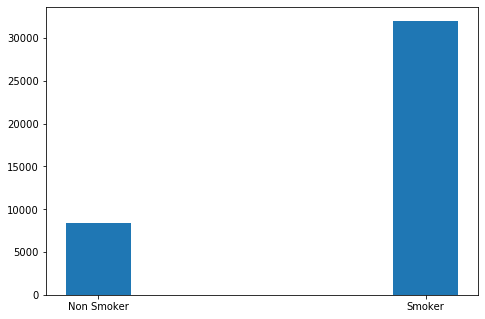

In [20]:
    smoker_charges =  []
    non_smoker_charges = []
    
    for detail in insurance_read:
        if detail['smoker'] == 'yes':
            smoker_charges.append(float(detail['charges']))
        else:
            non_smoker_charges.append(float(detail['charges']))
    
    avg_smoker_charge = np.mean(smoker_charges)
    avg_non_smoker_charge = np.mean(non_smoker_charges)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    smoker_type = ['Non Smoker', 'Smoker']
    avg_charge= [avg_non_smoker_charge, avg_smoker_charge]
    ax.bar(smoker_type, avg_charge, width = 0.2)
    


I also hypothesised that the age of correspondents affect the cost they pay to the insurance company. Let's find out more.

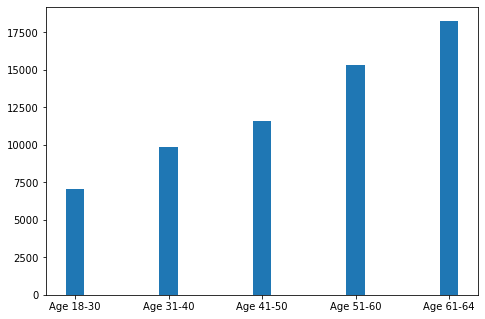

In [22]:
    cost_age_18to30 = []
    cost_age_31to40 = []
    cost_age_41to50 = []
    cost_age_51to60 = []
    cost_age_61to64 = []
    
    for detail in insurance_read:
        if 18 >= int(detail['age']) < 31:
            cost_age_18to30.append(float(detail['charges']))
        elif 31 >= int(detail['age']) < 41:
            cost_age_31to40.append(float(detail['charges']))
        elif 41 >= int(detail['age']) < 51:
            cost_age_41to50.append(float(detail['charges']))
        elif 51 >= int(detail['age']) < 60:
            cost_age_51to60.append(float(detail['charges']))
        else:
            cost_age_61to64.append(float(detail['charges']))
            
    avg_cost_18to30 = np.mean(cost_age_18to30)
    avg_cost_31to40 = np.mean(cost_age_31to40)
    avg_cost_41to50 = np.mean(cost_age_41to50)
    avg_cost_51to60 = np.mean(cost_age_51to60)
    avg_cost_60to64 = np.mean(cost_age_61to64)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    age_range = ['Age 18-30', 'Age 31-40', 'Age 41-50', 'Age 51-60', 'Age 61-64']
    avg_charge_age = [avg_cost_18to30, avg_cost_31to40, avg_cost_41to50, avg_cost_51to60, avg_cost_60to64]
    ax.bar(age_range, avg_charge_age, width = 0.2)
    plt.show()


How much is the difference of costs between 10 year of age increments? In average.

In [29]:
avg_cost_difference_age = ((avg_cost_31to40-avg_cost_18to30)+(avg_cost_41to50-avg_cost_31to40)+(avg_cost_51to60-avg_cost_41to50)+(avg_cost_60to64-avg_cost_51to60))/6

print('The incremental change in insurance cost for every increase of 10 years in age is ' + str(round(avg_cost_difference_age, 2)) + ' dollars.')

The incremental change in insurance cost for every increase of 10 years in age is 1868.64 dollars.



I think thats enough for making sure that age and smoking status are affecting the insurance cost the most.